# A Notebook to Create Plots for Price-Jones & Bovy 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
import spectralspace.sample.access_spectrum as acs
from spectralspace.analysis.empca_residuals import *
from scipy.interpolate import interp1d
import os, glob
from spectralspace.examples.ncells_calculation import *
from spectralspace.examples.comparative_plots import *
from spectralspace.examples.pc_plotter import *
%pylab inline

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



Populating the interactive namespace from numpy and matplotlib


 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



In [4]:
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  18
}

matplotlib.rc('font',**font)

default_cmap = 'plasma'
datadir = './data'
datadir = '/geir_data/scr/price-jones/Data/apogee_dim_reduction'
figdir = './fig/'
if not os.path.exists(datadir):
    os.system('mkdir -p {0}'.format(datadir))
    
if not os.path.exists(figdir):
    os.system('mkdir -p {0}'.format(figdir))

# Figures

## Figure 1 - Hertzsprung-Russell Diagrams

### Red clump sample

#### To generate data to create this plot, run the next box and fill in the prompts with responses given
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): <press Enter>  
Lower limit (Enter for minimum): <press Enter> 
Found good limits  
And/or? done```
#### Note that this part can take a few minutes

In [4]:
redclump = empca_residuals('apogee','red_clump',maskFilter,ask=True,degree=2,datadir=datadir)

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
And/or? done


### Red giant sample

#### Now run the box below and fill in the prompts with the responses given
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): <press Enter>  
Lower limit (Enter for minimum): <press Enter>  
Found good limits  
And/or? done```
#### Note that this part can take a few minutes

In [4]:
redgiant = empca_residuals('apogee','red_giant',maskFilter,ask=True,degree=2,datadir=datadir)

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
And/or? done


In [5]:
def histogram2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    im = ax.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap(default_cmap),
                   vmin=vmin,vmax=vmax)
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=20)
        cbar.ax.tick_params(labelsize=20)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=20)

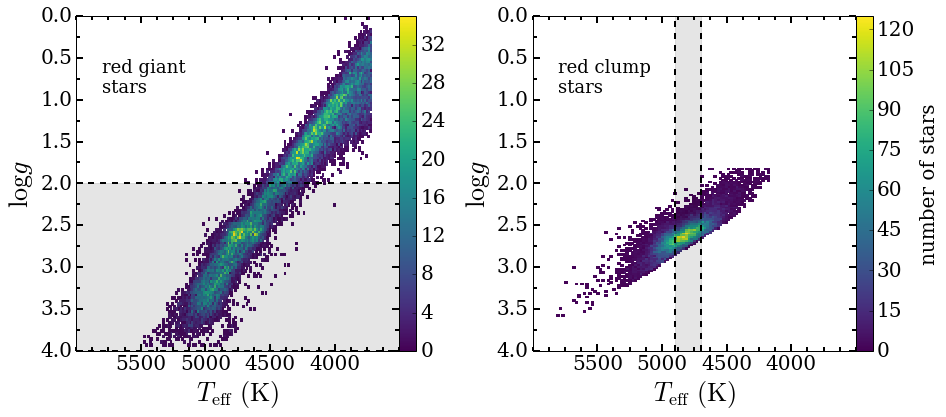

In [6]:
# Choose density colormap
default_cmap = 'viridis'
# Create figure of appropriate size
fig = plt.figure(figsize=(15,6))
# Create red giant subplot
ax = fig.add_subplot(121)
histogram2d(fig,ax,redgiant.teff,redgiant.logg,bins=120,vmax=35)
plt.ylim(4,0)
plt.xlim(6000,3500)
# Don't plot on extremes of axis
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
# Add minor ticks on both axes
xminorlocator = MultipleLocator(250./2)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = MultipleLocator(0.25)
ax.yaxis.set_minor_locator(yminorlocator)
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
plt.yticks(fontsize=20)
# Adjust tick thickness and length
plt.tick_params(which='both', width=2)
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=4)
# Add axis labels
plt.ylabel(r'$\log g$',fontsize=26)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,(\mathrm{K})$',fontsize=26)
# Shade sample area
plt.axhline(2,color='k',ls='--',lw=2)
plt.axhline(4,color='k',ls='--',lw=2)
plt.fill_between(np.arange(3500,6100,100),4,2,alpha=0.1,color='k')
# Add sample description
plt.text(5800,0.5,'red giant\nstars',va='top')

# Create red clump subplot
ax = fig.add_subplot(122)
histogram2d(fig,ax,redclump.teff,redclump.logg,clabel='number of stars',bins=80,vmax=125)
plt.ylim(4,0)
plt.xlim(6000,3500)
# Don't plot on extremes of x axis
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
# Add minor ticks to both axes
xminorlocator = MultipleLocator(250./2)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = MultipleLocator(0.25)
ax.yaxis.set_minor_locator(yminorlocator)
plt.yticks(fontsize=20)
# Adjust tick thickness and length
plt.tick_params(which='both', width=2)
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=4)
# Add axis labels
plt.ylabel(r'$\log g$',fontsize=26)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,(\mathrm{K})$',fontsize=26)
# Shade sample region
plt.axvline(4700,color='k',ls='--',lw=2)
plt.axvline(4900,color='k',ls='--',lw=2)
plt.fill_between(np.arange(4700,5000,100),4,0,alpha=0.1,color='k')
# Label sample
plt.text(5800,0.5,'red clump\nstars',va='top')

# Reduce space between plots and save
plt.subplots_adjust(wspace=0.2)
plt.savefig('{0}/{1}'.format(figdir,'HRdiagram.pdf'))

## Figure 2 - Example polynomial fit for NGC 6819 in Teff

#### Run the box below using the bolded responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819  
And/or? done```

In [7]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir=datadir)
oc.findResiduals(minStarNum=5,gen=True)

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? match
Match value: N6819
And/or? done


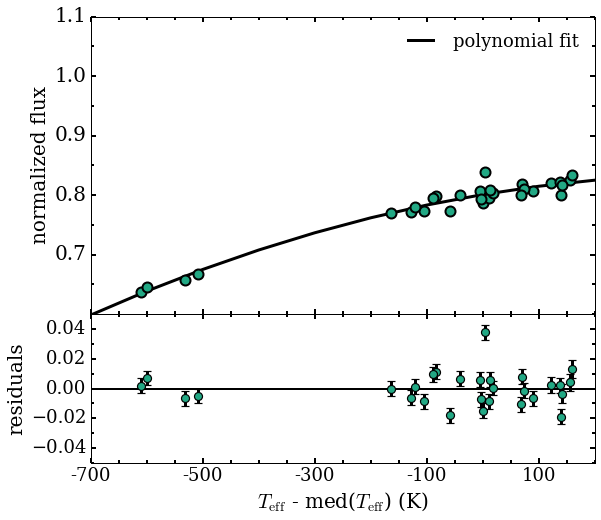

In [8]:
oc.plot_example_fit(indep=1,pixel=4313,xlabel='$T_{\mathrm{eff}}$ - med($T_{\mathrm{eff}}$) (K)',figsize=(10,8))
plt.subplots_adjust(left=0.2)
plt.savefig('{0}/example_fit.pdf'.format(figdir))

## Figure 3 - Comparing EMPCA model with data

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### This box will take a few minutes to run

In [6]:
subrc = empca_residuals('apogee','red_clump',maskFilter,ask=True,degree=2,badcombpixmask=7935,datadir = datadir)
subrc.findResiduals(gen=False)

Which data release? (Enter for 12): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4700
Found good limits
And/or? and
Data key: MEANFIB
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 300
Lower limit (Enter for minimum): 100
Found good limits
And/or? done


#### This box will take a few hours to run

In [ ]:
subrc.pixelEMPCA(nvecs=20,varfunc=meanMed,savename='eig20_minSNR50_corrNone_meanMed.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.01944634      2.22647129
EMPCA  2/25       0.12586238      1.84370218
EMPCA  3/25       0.23497501      1.59595446
EMPCA  4/25       0.25197757      1.56271999
EMPCA  5/25       0.25731060      1.55335551
EMPCA  6/25       0.25893361      1.55134022


In [5]:
subrcmodel = acs.pklread('{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/eig20_minSNR50_corrNone_meanMed.pkl'.format(datadir))
# Retrieve data
subrcmodel=getarrays(subrcmodel)
# Reconstruct unsaved data from model
subrcmodel=reconstruct_EMPCA_data('{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),subrcmodel,minStarNum=5)
# Start with baseline as 
totalapprox = np.tile(np.ma.mean(subrcmodel.residuals,axis=0),(subrcmodel.residuals.shape[0],1))
nvec = 8
for i in range(nvec):
    totalapprox += np.outer(subrcmodel.coeff[:, i], subrcmodel.eigvec[i])

ImportError: No module named empca_residuals

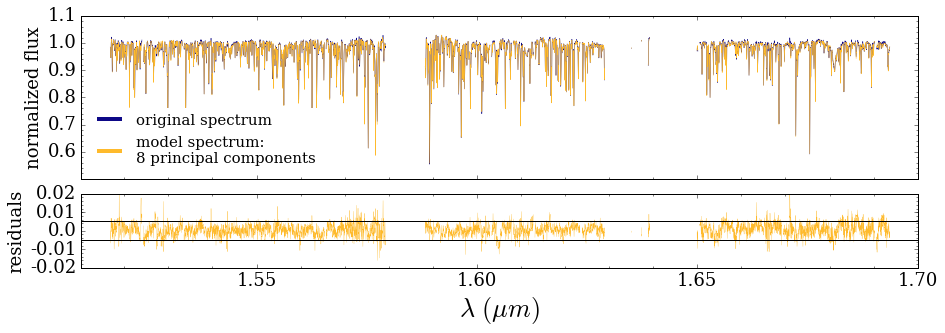

In [7]:
# Choose star
indx=312
# Retrieve plot colours
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,2))
# Set bounds on the apStarGrid
pixup = 8575
pixdown = 0

# Convert spectra to apStarGrid and reapply mask
fitspec = toApStarGrid(subrcmodel.fitspec[indx])
fitspec = np.ma.masked_array(fitspec,mask=fitspec==0)
modelspec = toApStarGrid(totalapprox[indx])
modelspec = np.ma.masked_array(modelspec,mask=modelspec==0)
compspec = toApStarGrid(subrcmodel.spectra[indx])
compspec = np.ma.masked_array(compspec,mask=(modelspec.mask|fitspec.mask))
resspec = toApStarGrid(subrcmodel.residuals[indx])
resspec = np.ma.masked_array(resspec,mask=compspec.mask)
errspec = toApStarGrid(subrcmodel.spectra_errs[indx])
errspec = np.ma.masked_array(errspec,mask=compspec.mask)
# Create array of wavelength values
wvs = pix2wv(np.arange(pixdown,pixup),apStarWavegrid = True)/1e4
# Specify xtick location
stepsize = 0.05
xticks = np.linspace(wvs[0],wvs[-1]+stepsize,stepsize)

# Initialize figure
plt.figure(figsize=(15,5))

# Begin model subplot
fit = plt.subplot2grid((3,1), (0, 0), rowspan=2)
# Plot spectrum and model
fit.plot(wvs,compspec[pixdown:pixup],lw=0.5,color=colors[0],label='original spectrum')
fit.plot(wvs,(modelspec[pixdown:pixup]+fitspec[pixdown:pixup]),lw=0.5,color=colors[-1],label='model spectrum:\n{0} principal components'.format(nvec))
fit.set_xlim(wvs[0],wvs[-1])
# Add minor ticks and labels
xminorlocator = AutoMinorLocator()
fit.xaxis.set_minor_locator(xminorlocator)
yminorlocator = AutoMinorLocator()
fit.yaxis.set_minor_locator(yminorlocator)
fit.set_xticklabels(['']*len(xticks))
fit.set_ylabel('normalized flux')
ymax=1.1
ymin=0.6
yticks = np.linspace(ymin,ymax,6)
fit.set_yticks(yticks)
fit.set_yticklabels(yticks)
# Create legend
legend = fit.legend(loc='best',fontsize=15)
legend.get_frame().set_linewidth(0.0)
for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)
    
# Begin residual subplot
res = plt.subplot2grid((3,1), (2, 0))
# Plot model residuals
res.plot(wvs,(compspec[pixdown:pixup] - (modelspec[pixdown:pixup]+fitspec[pixdown:pixup])),lw=0.3,color=colors[-1])
# Mark median measurement uncertainty
res.axhline(-np.ma.median(errspec[pixdown:pixup]),color='k')
res.axhline(np.ma.median(errspec[pixdown:pixup]),color='k')
res.set_xlim(wvs[0],wvs[-1])
# Add minor ticks and labels
ymax=0.02
ymin=-0.02
yticks = np.linspace(ymin,ymax,5)
res.set_ylim(ymin,ymax)
res.set_yticks(yticks)
res.set_yticklabels(yticks)
xminorlocator = AutoMinorLocator()
res.xaxis.set_minor_locator(xminorlocator)
yminorlocator = AutoMinorLocator()
res.yaxis.set_minor_locator(yminorlocator)
res.set_ylabel('residuals')
res.set_xlabel('$\lambda\,\,(\mu m)$',fontsize=26)

# Adjust subplot positions and save figure
plt.subplots_adjust(bottom=0.2)
plt.savefig('{0}/model_comp_star{1}.pdf'.format(figdir,indx))

## Figure 4 - Open cluster R2 values

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? done  ```

#### This box will run in a minute or two

In [11]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir = datadir)
oc.findResiduals(gen=True)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
And/or? done


       iter        R2             rchi2
EMPCA  1/25       0.02743710      2.15454551
EMPCA  2/25       0.44650347      1.16119223
EMPCA  3/25       0.48223360      1.08120052
EMPCA  4/25       0.49317930      1.04567822
EMPCA  5/25       0.49492291      1.03822769
EMPCA  6/25       0.49460306      1.03656246
EMPCA  7/25       0.49752652      1.03138938
EMPCA  8/25       0.50024633      1.02678075
EMPCA  9/25       0.50174338      1.02429422
EMPCA 10/25       0.50173508      1.02345289
EMPCA 11/25       0.50158339      1.02324231
EMPCA 12/25       0.50143777      1.02428133
EMPCA 13/25       0.49983319      1.02646577
EMPCA 14/25       0.50122245      1.02580904
EMPCA 15/25       0.50250706      1.02314179
EMPCA 16/25       0.50266665      1.02253011
EMPCA 17/25       0.50269339      1.02223737
EMPCA 18/25       0.50275535      1.02205607
EMPCA 19/25       0.50172497      1.02261512
EMPCA 20/25       0.50192454      1.02338730
EMPCA 21/25       0.50162985      1.02448992
EMPCA 22/25    

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? and  
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### This box will run in a minute or two

In [12]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir = datadir)
oc.findResiduals(gen=True)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? match
Match value: N6819
And/or? and
Data key: MEANFIB
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 300
Lower limit (Enter for minimum): 100
Found good limits
And/or? done


       iter        R2             rchi2
EMPCA  1/25       0.03179922      2.01400134
EMPCA  2/25       0.44010242      1.10722209
EMPCA  3/25       0.49169135      0.99308733
EMPCA  4/25       0.51056359      0.95814406
EMPCA  5/25       0.51974173      0.94375517
EMPCA  6/25       0.52582534      0.93557059
EMPCA  7/25       0.53035871      0.93020036
EMPCA  8/25       0.53377262      0.92653692
EMPCA  9/25       0.53705238      0.92423859
EMPCA 10/25       0.53929358      0.92241126
EMPCA 11/25       0.54075356      0.92117685
EMPCA 12/25       0.54178052      0.92032891
EMPCA 13/25       0.54251088      0.91975210
EMPCA 14/25       0.54303443      0.91936208
EMPCA 15/25       0.54341321      0.91909848
EMPCA 16/25       0.54368960      0.91892002
EMPCA 17/25       0.54278131      0.92030013
EMPCA 18/25       0.54299534      0.91907316
EMPCA 19/25       0.54275857      0.91883233
EMPCA 20/25       0.54166237      0.92037926
EMPCA 21/25       0.54104906      0.92093012
EMPCA 22/25    

#### Run the box below using the bolded responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? and  
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### This box will run in a minute or two

In [13]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,badcombpixmask=7935,datadir = datadir)
oc.findResiduals(gen=True)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
And/or? and
Data key: MEANFIB
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 300
Lower limit (Enter for minimum): 100
Found good limits
And/or? done


       iter        R2             rchi2
EMPCA  1/25       0.02880928      2.04108027
EMPCA  2/25       0.39579187      1.20524583
EMPCA  3/25       0.44734539      1.09713076
EMPCA  4/25       0.49034204      1.01149082
EMPCA  5/25       0.51288578      0.96843456
EMPCA  6/25       0.51876520      0.95871497
EMPCA  7/25       0.52630861      0.94607879
EMPCA  8/25       0.53529254      0.93188445
EMPCA  9/25       0.54090909      0.92337396
EMPCA 10/25       0.54451495      0.92030595
EMPCA 11/25       0.54650387      0.91636915
EMPCA 12/25       0.54746234      0.91469748
EMPCA 13/25       0.54799045      0.91363268
EMPCA 14/25       0.54816852      0.91310929
EMPCA 15/25       0.54798616      0.91314320
EMPCA 16/25       0.54758730      0.91276159
EMPCA 17/25       0.54796483      0.91220976
EMPCA 18/25       0.54748740      0.91273085
EMPCA 19/25       0.54727027      0.91296027
EMPCA 20/25       0.54720335      0.91309916
EMPCA 21/25       0.54719393      0.91325467
EMPCA 22/25    

/usr/lib64/python2.7/site-packages/matplotlib/lines.py:1082: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markeredgecolor != ec:



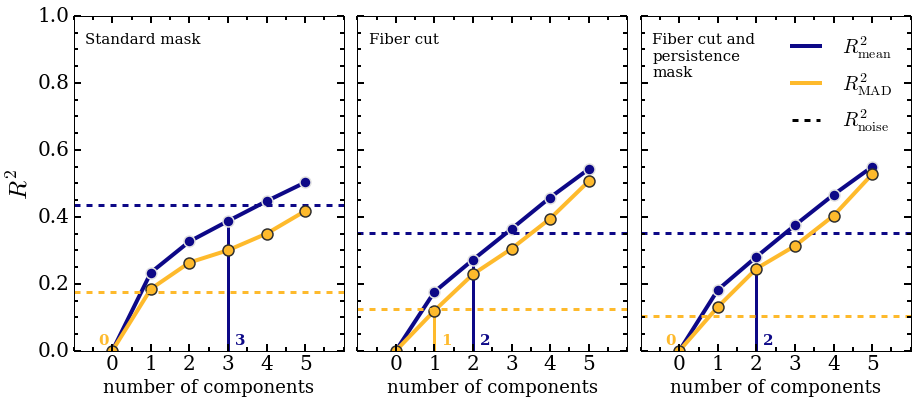

In [14]:
direcs = ['{0}/clusters_12_CLUSTER_matchN6819/bm4351'.format(datadir),
          '{0}/clusters_12_CLUSTER_matchN6819_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/clusters_12_CLUSTER_matchN6819_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard mask',
          'Fiber cut',
          'Fiber cut and \npersistence\nmask']
models = ['eig5_minSNR50_corrNone_var.pkl',
          'eig5_minSNR50_corrNone_meanMed.pkl']
labels = [r'$R^2_{\mathrm{mean}}$',r'$R^2_{\mathrm{MAD}}$']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6))


## Figure 5 - R2 for red clump 200K slice subsample comparison

### To create the data for this figure, an external script is needed
Run **rc_example_method_comp.py** 3 times after modifying the `datadir` variable to match the one defined at the top of this notebook (local directory by default). Each run takes of order a day to complete, so consider running them in parallel and use a tool like [screen](https://www.gnu.org/software/screen/manual/screen.html) to allow them to run in the background.

The script will prompt for responses for each of the three runs. Each will create subsamples of the full sample to use in jackknifing - the number of subsamples run in parallel at a given time is controlled by the `maxsamp` parameter at the top of the file. Fill out the prompts for each run with the responses given below.

#### First run

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? done```

#### Second run

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Third run - prior to beginning this, change the `bmask` variable to 7935

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

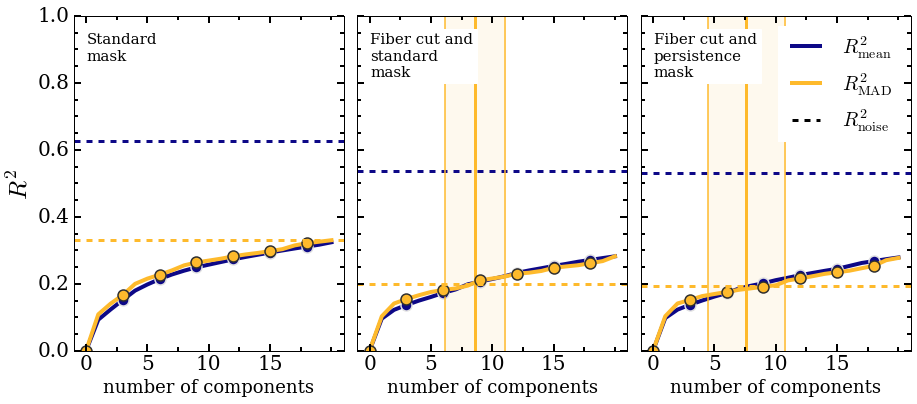

In [15]:
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard\nmask',
          'Fiber cut and\nstandard\nmask',
          'Fiber cut and\npersistence\nmask']
models = ['eig20_minSNR50_corrNone_var.pkl',
          'eig20_minSNR50_corrNone_meanMed.pkl']
labels = [r'$R^2_{\mathrm{mean}}$',r'$R^2_{\mathrm{MAD}}$']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))        

contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6),subsamples=25)

## Figure 6 - Ncells for red clump 200K slice subsample comparison

### This figure uses the same data as used in Figure 5 above

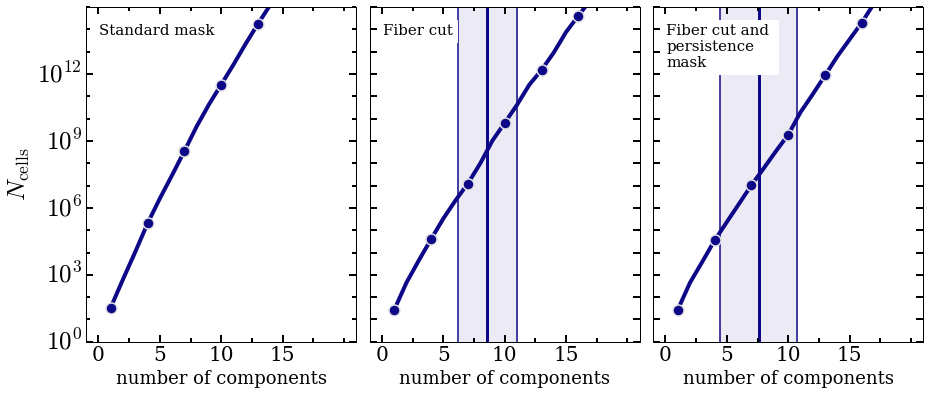

In [16]:
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard mask',
          'Fiber cut',
          'Fiber cut and \npersistence\nmask']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))

contrast_Ncells(direcs,models,labels,colors,titles=titles,figsize=(15,6),generate = True,subsamples=25,makemodel=False)

## Figure 7 - R2-R2noise intersection for various samples

### This plot also requires an external script to generate data

Run **sample_jackknife.py** 5 times after modifying the `datadir` variable to match the one defined at the top of this notebook (local directory by default). Each run takes of order a day to complete, so consider running them in parallel and use a tool like [screen](https://www.gnu.org/software/screen/manual/screen.html) to allow them to run in the background.

The script will prompt for responses for each of the five runs. Each will create subsamples of the full sample to use in jackknifing - the number of subsamples run in parallel at a given time is controlled by the `maxsamp` parameter at the top of the file.  Fill out the prompts for each run with the responses given below.

For strict reproduction, one also needs to fix the random seed to be consistent. This will only ensure reproducability on the same machine, not between users, but I've put the random seeds used by the authors for each run, which can be set by changing the `seed` variable.

#### First run - seed 44
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4800   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Second run - seed 26
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Third run -seed 36
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4800  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

**Change the `sample_type` variable from `'red_clump'` to `'red_giant'` for subsequent runs.**

#### Fourth run - seed 95
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: LOGG  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4   
Lower limit (Enter for minimum): 3  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Fifth run - seed 62
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: LOGG  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 3   
Lower limit (Enter for minimum): 2  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

array([  5.95173614,   7.72443255,   9.7360138 ,  14.13461626,  11.59370024])

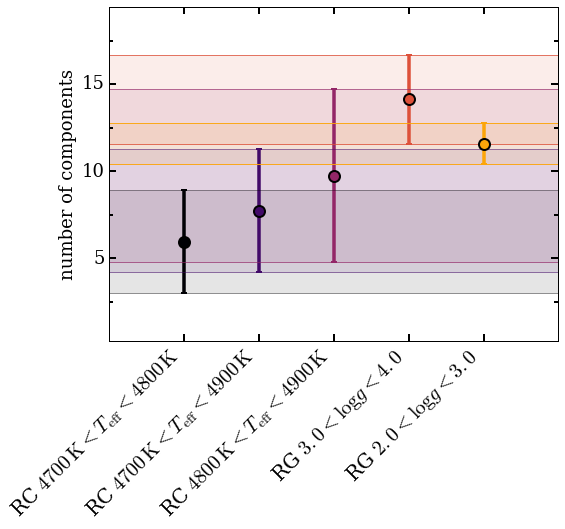

In [17]:
direcs = ['{0}/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']

# Set to empty list to use all available data
seeds = [44,26,36,95,62]
colours = plt.get_cmap('inferno')(np.linspace(0,0.8,len(models)*len(direcs)))
sample_compare_nvec(direcs,models,labels,subsamples=25,figsize=(8,8),seeds=seeds,colours=colours,
                    savename='nvec_comp.pdf',rotation=45,ha='right',bottom_margin=0.35)

## Figure 8 - Ncells at R2-R2noise intersection for various samples

### This plot uses the same data as figure 7 above

array([  2.93888742e+05,   4.53409254e+07,   7.39185410e+07,
         2.71403656e+11,   1.31407433e+12])

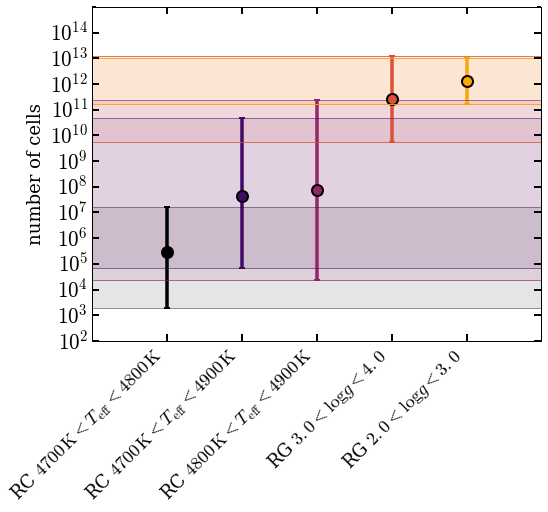

In [18]:
direcs = ['{0}/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']

# Set to empty list to use all available data
seeds = [44,26,36,95,62]
colours = plt.get_cmap('inferno')(np.linspace(0,0.8,len(models)*len(direcs)))
sample_compare_ncells(direcs,models,labels,subsamples=25,generate=True,seeds=seeds,figsize=(8,8),colours=colours,
                      savename='ncells_comp.pdf',rotation=45,ha='right',bottom_margin=0.35)

## Unused Figure - Modelling Ncells

### This figure uses the same data as figure 7 above

8.90481109177 1.74213136512 5.37697761068 1.507986129


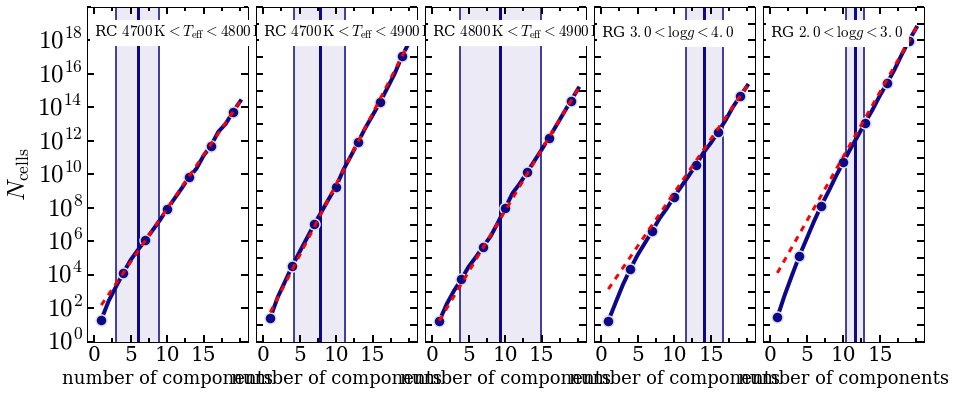

In [19]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))

# Set to empty list to use all available data
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),ybounds=(1,1e20),generate=True,subsamples=25,denom=consth,ncent=10)

Ncells_expo = np.median(p[:,0])
delta_Ncells_expo = np.sqrt(meanMed(p[:,0]))
Ncells_fact = np.median(p[:,1])
delta_Ncells_fact = np.sqrt(meanMed(p[:,1]))
print Ncells_expo, delta_Ncells_expo, Ncells_fact, delta_Ncells_fact

## Figure 10 - Median-scaled principal components in the example slice

### This figure uses data first generated for figure 5 above

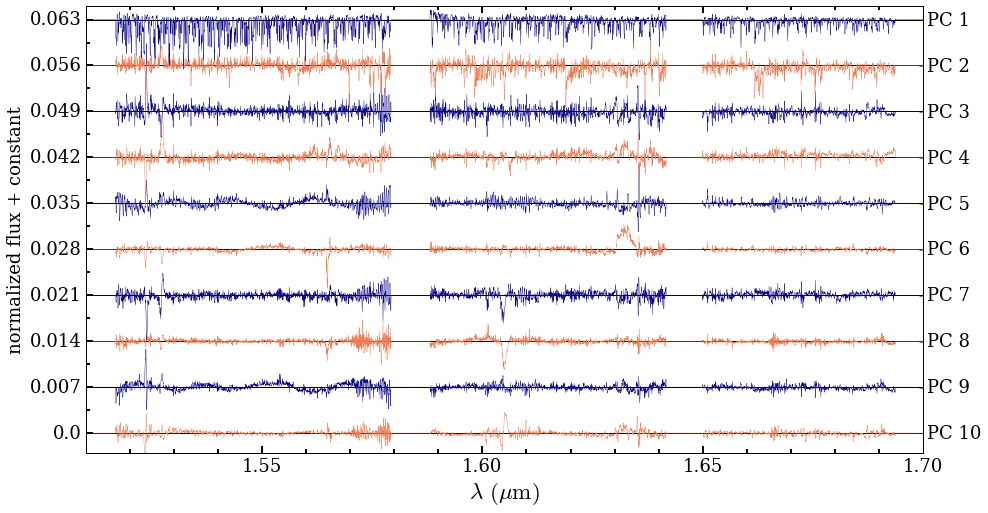

In [20]:
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
# Number of eigenvectors to plot
n=10
# Pixel range
pixup = 8575
pixdown = 0
# Load and assign model data
subrcmodel = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl_data.npz'.format(direcs[0]))
eigvec = subrcmodel['eigvec']
coeff = subrcmodel['coeff']
# Scale components by median coefficient and offset each component 
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
oset = 0.007
plt.figure(figsize=(15,8))
plot_fullvec((eigvec*medcoeff)[:n],n=n,pixup=pixup,pixdown=pixdown,oset=oset,ncol = 4,cmap='plasma',maxval=0.67)
plt.savefig('{0}/median_scaled_eigvec.pdf'.format(figdir))